# Cuarta sesión

**Objetivos:** 

- Revisar trabajo con string
- Importar un texto
- instalar nltk
- tokenizar el texto

In [ ]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re
import string

import matplotlib.pyplot as plt

## String

Los string son una secuencia de caractéres y los caractéres son símbolos como por ejemplo:'-', 'a', '1', '\n'; etc..
Como los computadores entienden en binario, el proceso de pasar a un simbolo (caracter) se llama **codificar** y de un simbolo a bianrio **decodificar**. Las más usadas forma conversión son [ACII](http://www.asciitable.com/) y Unicode.  

In [9]:
#algo de string
string1 = ""

print("la cadena es: {}".format(string1))

la cadena es: 


In [12]:
string2 = "La bicileta blanca"
print("la cadena es: {}".format(string2))

la cadena es: La bicileta blanca


In [15]:
string2[0]

'L'

In [16]:
string2[0:2]

'La'

In [ ]:
# podría seleccionar bicileta?

#string2[??????]

## algunas operaciones más con string

In [23]:
# concatenar string
#string1 + string2

palabra1 = "M.A.C.R.I"
palabra2 = ' "Mente anti capitalista revolucionaria internacional"'

print("Las Manos de Filippi tiene un disco que se llama: {}".format(palabra1 + ": "+ palabra2))

Las Manos de Filippi tiene un disco que se llama: M.A.C.R.I:  "Mente anti capitalista revolucionaria internacional"


In [27]:
S1 = "HOLA"
S2 = "COSMOS"

S1 + S2
#falta un espacio?

'HOLACOSMOS'

In [29]:
# no me girtes!!!!
s1 = S1.lower()
s2 = S2.lower()

s1 + " " + s2

'hola cosmos'

In [39]:
#Estrofa: un grupo de versos seguidos de un punto aparte,de un punto seguido o un punto y coma ...
versos_cancion = ["no puedes ser feliz", "con tanta gente hablando", "hablando a tu alrededor"]
estrofa = ""
for verso in versos_cancion:
    estrofa += verso + "; "

estrofa

'no puedes ser feliz; con tanta gente hablando; hablando a tu alrededor; '

In [38]:
# y el join
"; ".join(versos_cancion)

'no puedes ser feliz, con tanta gente hablando, hablando a tu alrededor'

## leyendo un archivo txt

Los archivos se deben leer linea a linea. 

In [17]:
fname = "data/ante_laley.txt"
cuento = ""
with open(fname, 'r') as f:
    for line in f:
        cuento += line
        

In [26]:
#cuán extenso es el relato
print("El relato tiene {} caracteres".format(len(cuento)))

El relato tiene 3325 caracteres


In [27]:
#tokenizar texto

token_relato = nltk.word_tokenize(cuento)

In [31]:
token_relato[:10]

['Ante', 'la', 'ley', 'hay', 'un', 'guardián', '.', 'Un', 'campesino', 'se']

In [39]:
stopword = stopwords.words('spanish')
stopword[:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [49]:
pd.Series(token_relato).value_counts().head(15)

,           39
.           31
que         24
de          21
y           18
el          17
guardián    17
la          14
a           13
para        11
se          11
le          11
su          10
en           8
no           8
dtype: int64

In [44]:
# pasndo a minusculas
relato =  [ palabra.lower() for palabra in token_relato]

In [50]:
pd.Series(relato).value_counts().head(15)

,           39
.           31
que         24
el          24
de          21
y           19
guardián    17
la          15
a           13
se          11
le          11
para        11
su          10
en           8
no           8
dtype: int64

In [51]:
# pasndo a minusculas
relato =  [ palabra.lower() for palabra in token_relato if palabra not in stopword]

In [53]:
pd.Series(relato).value_counts().head(10)

,           39
.           31
guardián    17
entrar       7
el           7
ley          7
ahora        5
;            5
hombre       5
años         5
dtype: int64

In [60]:
stopword = stopwords.words('spanish') + list(string.punctuation)
stopword[-10:]

['[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']

In [61]:
# pasndo a minusculas
relato =  [ palabra.lower() for palabra in token_relato if palabra not in stopword]

In [64]:
relato_serie = pd.Series(relato).value_counts().head(10)

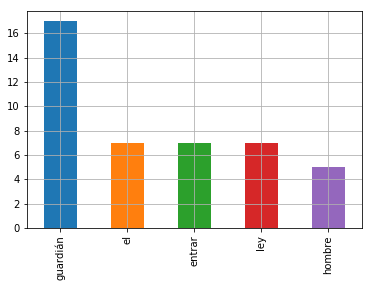

In [89]:
relato_serie[:5].plot("bar")
plt.grid(True)

In [91]:
total = relato_serie.sum()


In [94]:
freq_relato = relato_serie.div(total) *100


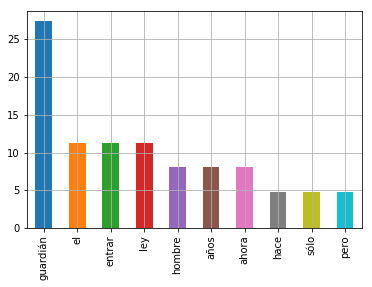

In [95]:
freq_relato.plot("bar")
plt.grid(True)